In [ ]:
'''
CS6140 Assignment 1
Q2.1 - 2.4 Linear Regression

Wing Man, Kwok  
05/22/2022
'''

In [62]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time                                   #import time.time command to compare BGD v/s SGD

In [63]:
# Pre-defined functions by assignment.  Function to compute cost
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    num_samples = len(ip)
    cost_sum = 0.0
    for x,y in zip(ip, op):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples)
    
    return cost

In [64]:
# Batch Gradient Descent to compute theta
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """ 
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(ip)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    ip_with_bias = np.c_[ np.ones(ip.size), ip]       #prepend x variables with bias of column all 1
    start_time = time.time()                          #timestamp running time

    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:

        #Calculate all samples before updating cost, so it is batch gradient descent. 
        #it won't arrive at faster computation nor accuracy, but require more computer resources because all data points are processed at a time 
        cost[iteration] = compute_cost(ip, op, params)  
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        # Apply batch gradient descent
        for i in range(num_samples):
          y_hat = np.dot(params, np.array([1.0, ip[i]]))
          params += (alpha/num_samples) * (op[i] - y_hat) * np.array([1.0, ip[i]])

        iteration += 1
      
    print("\nrun time", time.time() - start_time)
    
    return params, cost, params_store

In [65]:
# Stochastic Gradient Descent to compute theta
def lin_reg_stoch_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """

    # initialize iteration, number of samples, cost and parameter array
    num_samples = len(ip)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    
    start_time = time.time()

    # Compute the cost and store the params for the corresponding cost
    for x,y in zip(ip, op):
        cost[i] = compute_cost(ip, op, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        # Apply stochastic gradient descent 
        # Cost is computed for every data point, so it is stochastic
        y_hat = np.dot(params, np.array([1.0, x]))  #np.array instead of purley ip[i], is because the whole ip[i] features have to be considered
        params += (alpha/num_samples) * (y - y_hat) * np.array([1.0, x]) 
          
        i += 1
    
    print("\nrun time:", time.time() - start_time)
    
    return params, cost, params_store

In [ ]:
#Pre-defined code to call gradient descent functions

In [66]:
# Do not change the code in this cell
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

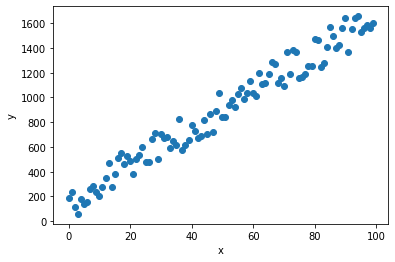

In [67]:
# Do not change the code in this cell
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Pre-defined code to train the model by batch gradient descent

In [68]:
# Do not change the code in this cell
# Train the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 100
params_hat_batch, cost_batch, params_store_batch =\
    linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 14122171.37937596
--------------------------
iteration: 1
cost: 21251.606965066145
--------------------------
iteration: 2
cost: 10581.750130289729
--------------------------
iteration: 3
cost: 10526.976312084651
--------------------------
iteration: 4
cost: 10524.23282462652
--------------------------
iteration: 5
cost: 10522.656899235259
--------------------------
iteration: 6
cost: 10521.110768318693
--------------------------
iteration: 7
cost: 10519.566087690271
--------------------------
iteration: 8
cost: 10518.022148896798
--------------------------
iteration: 9
cost: 10516.478933907192
--------------------------
iteration: 10
cost: 10514.936441940554
--------------------------
iteration: 11
cost: 10513.394672647195
--------------------------
iteration: 12
cost: 10511.853625688304
--------------------------
iteration: 13
cost: 10510.31330072551
--------------------------
iteration: 14
cost: 10508.773697420627
-----------------------

In [ ]:
# Pre-defined code to train the model by stochastic gradient descent

In [69]:
# Do not change the code in this cell
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 14122171.37937596
--------------------------
iteration: 1
cost: 13336896.916807361
--------------------------
iteration: 2
cost: 11269979.941716973
--------------------------
iteration: 3
cost: 9146051.934846554
--------------------------
iteration: 4
cost: 8578289.833428843
--------------------------
iteration: 5
cost: 8409810.999656076
--------------------------
iteration: 6
cost: 8090214.142790841
--------------------------
iteration: 7
cost: 6601994.805458421
--------------------------
iteration: 8
cost: 5613572.499838609
--------------------------
iteration: 9
cost: 5053219.846712693
--------------------------
iteration: 10
cost: 4464370.81247338
--------------------------
iteration: 11
cost: 4173698.299805579
--------------------------
iteration: 12
cost: 3551025.484078236
--------------------------
iteration: 13
cost: 2931513.110975801
--------------------------
iteration: 14
cost: 2280348.9244087213
--------------------------
iterat

In [70]:
# Calculate Root Mean Square error in batch gradient descent algorithm and stochastic gradient descent algorithm
ss_batch = 0;  ss_SGD = 0;

for i in range(x_test.size):
  y_hat_batch = params_hat_batch[0] + params_hat_batch[1] * x_test[i] 
  y_hat_SGD = params_hat[0] + params_hat[1] * x_test[i] 
  ss_batch += (y_hat_batch - y_test[i] )**2            #compute sum of square
  ss_SGD += (y_test[i] - y_hat_SGD)**2

rmse_BatchGradientDescent = np.sqrt(rms_batch/x_test.size)
rmse_SGD = np.sqrt(rms_SGD/x_test.size)
print("batch rms:\t", rmse_BatchGradientDescent)
print("stochastic rms:\t", rmse_SGD)

batch rms:	 104.0980647949823
stochastic rms:	 156.06769004265874


In [ ]:
#Plot Performance of batch gradient descent and stochastic gradient descent

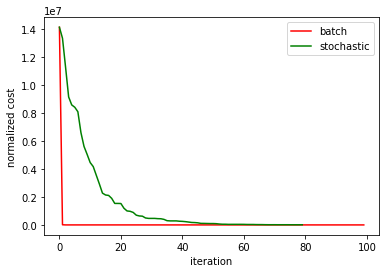

min cost with BGD: 10380.509594820354
min cost with SGD: 20193.223862227725


In [71]:
# Do not change the code in this cell
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')


<p>Q2.4.  Under this dataset with 100 datapoints, batch gradient descent shows better performance in terms of resulting a less cost after 100 iterations.

On the other hand, stochastic gradient descent shows faster computation, as show from the above printout (0.18 second versus 0.35 second).

For small dataset like this example, I would tend to use batch gradient descent in order to get a better cost, while computer resources isn't an issue.

However, when a dataset is large, stochastic gradient descent would be a better choice, since it doesn't overwhelm or spike computation resources in a single computation, so less memory requirement for real world application.